# News Headlines Sentiment - Gregory Terrinoni

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 


In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi.newsapi_client import NewsApiClient
from datetime import date
analyzer = SentimentIntensityAnalyzer()


%matplotlib inline

In [2]:
# Reading api key environment variable
load_dotenv()

True

In [3]:
# Creating a newsapi client
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [4]:
# Fetching the Bitcoin news articles
end = date.today().strftime("%Y-%m-%d")
start = (pd.to_datetime(end) - pd.DateOffset(days=29)).strftime("%Y-%m-%d")

btc_articles = newsapi.get_everything(
                q='bitcoin',
                from_param=start,
                to=end,
                language="en",
                sort_by="relevancy")

In [5]:
# Fetching the Ethereum news articles
eth_articles = newsapi.get_everything(
                q='ethereum',
                from_param=start,
                to=end,
                language="en",
                sort_by="relevancy")

In [140]:
# Creating the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        btc_sentiments.append({
           
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "text": text           
        })
        
    except AttributeError:
        pass
    
# Creating DataFrame
btc_sentiments = pd.DataFrame(btc_sentiments)

# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
btc_sentiments_df = btc_sentiments[cols]
btc_sentiments_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...
4,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."


In [205]:
# Creating the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        eth_sentiments.append({
           
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "text": text           
        })
        
    except AttributeError:
        pass
    
# Creating DataFrame
eth_sentiments = pd.DataFrame(eth_sentiments)

# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
eth_sentiments_df = eth_sentiments[cols]
eth_sentiments_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
3,0.0000,0.0,1.000,0.000,FILE PHOTO: A representation of virtual curren...
4,0.0000,0.0,1.000,0.000,FILE PHOTO: Representations of virtual currenc...


In [142]:
# Describing the Bitcoin Sentiment
btc_sentiments_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.254679,0.017579,0.901158,0.081211
std,0.351953,0.035419,0.085168,0.076616
min,-0.585900,0.000000,0.773000,0.000000
25%,0.000000,0.000000,0.827500,0.000000
50%,0.202300,0.000000,0.897000,0.072000
75%,0.532650,0.000000,1.000000,0.157000
max,0.801600,0.103000,1.000000,0.209000


In [143]:
# Describing the Ethereum Sentiment
eth_sentiments_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.134485,0.004250,0.953400,0.042350
std,0.246135,0.019007,0.079521,0.075597
min,-0.128000,0.000000,0.682000,0.000000
25%,0.000000,0.000000,0.931500,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.195925,0.000000,1.000000,0.064000
max,0.877900,0.085000,1.000000,0.318000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [144]:
#Importing dependencies 
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

lemmatizer = WordNetLemmatizer()

In [161]:
# Expanding the default stopwords list if necessary
sw = set(stopwords.words('english'))
sw_addon = {'file', 'photo', 'reuters','representation', 
            'illustration', 'motherboard', 'PC', 'picture',
            'reutersdado', 'ruvicillustrationlondon', 'char', 'visahas'}

In [162]:
# Defining the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens

In [163]:
#Looping through the bitcoin text to create a list of tokens
btc_text = btc_sentiments_df['text'].tolist()
btc_tokens = []
for text in btc_text:
    tokens = tokenizer(text)
    btc_tokens.append(tokens)

# Adding that list of tokens to the sentiments dataframe
btc_sentiments_df['tokens'] = btc_tokens
btc_sentiments_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[partnered, cryptocurrency, startup, blockfi, ..."
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...,"[reaching, previous, alltime, high, november, ..."
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...,"[almost, three, year, day, since, price, bitco..."
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...,"[everything, dumb, worksas, come, close, crypt..."
4,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, twomonth, rall..."


In [164]:
#Looping through the ethereum text to create a list of tokens
eth_text = eth_sentiments_df['text'].tolist()
eth_tokens = []
for text in eth_text:
    tokens = tokenizer(text)
    eth_tokens.append(tokens)
    
# Adding that list of tokens to the sentiments dataframe
eth_sentiments_df['tokens'] = eth_tokens
eth_sentiments_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[ethereum, virtual, currency, standing, pc, se..."
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[ethereum, virtual, currency, standing, pc, se..."
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[london, digital, currency, ethereum, xrp, soa..."
3,0.0000,0.0,1.000,0.000,FILE PHOTO: A representation of virtual curren...,"[virtual, currency, bitcoin, seen, front, stoc..."
4,0.0000,0.0,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,"[representations, virtual, currency, bitcoin, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [165]:
#Importing dependencies 
from collections import Counter
from nltk import ngrams

In [166]:
# Joining the list of lists to a single list of words to feed into ngrams
btc_unpacked = [x for i in btc_tokens for x in i]

# Generating the Bitcoin N-grams where N=2
bigram_counts_btc = Counter(ngrams(btc_unpacked, n=2))
print(dict(bigram_counts_btc))

{('partnered', 'cryptocurrency'): 1, ('cryptocurrency', 'startup'): 1, ('startup', 'blockfi'): 1, ('blockfi', 'offer'): 1, ('offer', 'first'): 1, ('first', 'reward'): 1, ('reward', 'credit'): 1, ('credit', 'card'): 1, ('card', 'pay'): 1, ('pay', 'bitcoin'): 1, ('bitcoin', 'rather'): 1, ('rather', 'cash'): 1, ('cash', 'worth'): 1, ('worth', 'applying'): 1, ('applying', 'unless'): 1, ('unless', 'youre'): 1, ('youre', 'extremely'): 1, ('extremely', 'bullish'): 1, ('bullish', 'reaching'): 1, ('reaching', 'previous'): 1, ('previous', 'alltime'): 1, ('alltime', 'high'): 3, ('high', 'november'): 1, ('november', 'th'): 1, ('th', 'december'): 1, ('december', 'st'): 1, ('st', 'bitcoin'): 1, ('bitcoin', 'trading'): 1, ('trading', 'well'): 1, ('well', 'ha'): 1, ('ha', 'surpassed'): 1, ('surpassed', 'previous'): 1, ('previous', 'peak'): 1, ('peak', 'pricebitcoins'): 1, ('pricebitcoins', 'value'): 1, ('value', 'ha'): 1, ('ha', 'rapidly'): 1, ('rapidly', 'almost'): 1, ('almost', 'three'): 1, ('three'

In [167]:
# Joining the list of lists to a single list of words to feed into ngrams
eth_unpacked = [x for i in eth_tokens for x in i]

# Generating the Ethereum N-grams where N=2
bigram_counts_eth = Counter(ngrams(eth_unpacked, n=2))
print(dict(bigram_counts_eth))

{('ethereum', 'virtual'): 3, ('virtual', 'currency'): 12, ('currency', 'standing'): 2, ('standing', 'pc'): 2, ('pc', 'seen'): 2, ('seen', 'february'): 2, ('february', 'ethereum'): 1, ('february', 'london'): 1, ('london', 'digital'): 1, ('digital', 'currency'): 1, ('currency', 'ethereum'): 1, ('ethereum', 'xrp'): 1, ('xrp', 'soared'): 1, ('soared', 'monday'): 1, ('monday', 'gaining'): 1, ('gaining', 'momentum'): 1, ('momentum', 'bitcoin'): 1, ('bitcoin', 'powered'): 1, ('powered', 'towards'): 1, ('towards', 'alltime'): 1, ('alltime', 'highfile'): 1, ('highfile', 'ethereum'): 1, ('currency', 'virtual'): 1, ('currency', 'bitcoin'): 9, ('bitcoin', 'seen'): 8, ('seen', 'front'): 3, ('front', 'stock'): 3, ('stock', 'graph'): 3, ('graph', 'taken'): 3, ('taken', 'november'): 6, ('november', 'major'): 1, ('major', 'us'): 3, ('us', 'representations'): 1, ('representations', 'virtual'): 3, ('seen', 'taken'): 5, ('taken', 'taken'): 2, ('taken', 'march'): 2, ('march', 'major'): 2, ('us', 'cryptocur

In [168]:
# Defining token_count function
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [169]:
# Getting the top 10 words for Bitcoin
token_count(bigram_counts_btc)

[(('alltime', 'high'), 3),
 (('virtual', 'currency'), 3),
 (('copyrightgetty', 'imagesbitcoin'), 2),
 (('new', 'alltime'), 2),
 (('bitcoin', 'ha'), 2),
 (('stafffile', 'virtual'), 2),
 (('currency', 'bitcoin'), 2),
 (('bitcoin', 'seen'), 2),
 (('taken', 'november'), 2),
 (('seen', 'taken'), 2)]

In [170]:
# Getting the top 10 words for Ethereum
token_count(bigram_counts_eth)

[(('virtual', 'currency'), 12),
 (('currency', 'bitcoin'), 9),
 (('bitcoin', 'seen'), 8),
 (('taken', 'november'), 6),
 (('seen', 'taken'), 5),
 (('ethereum', 'virtual'), 3),
 (('seen', 'front'), 3),
 (('front', 'stock'), 3),
 (('stock', 'graph'), 3),
 (('graph', 'taken'), 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [171]:
# Importing dependencies 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

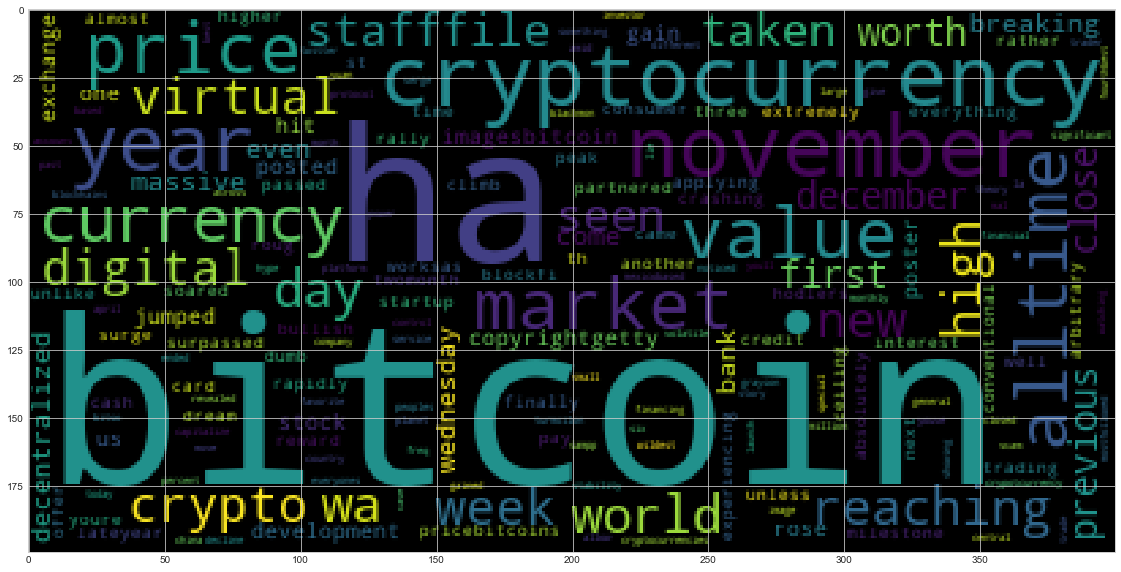

In [172]:
# Generating the Bitcoin word cloud
btc_joined = " ".join(btc_unpacked)
wc = WordCloud().generate(btc_joined)
plt.imshow(wc)

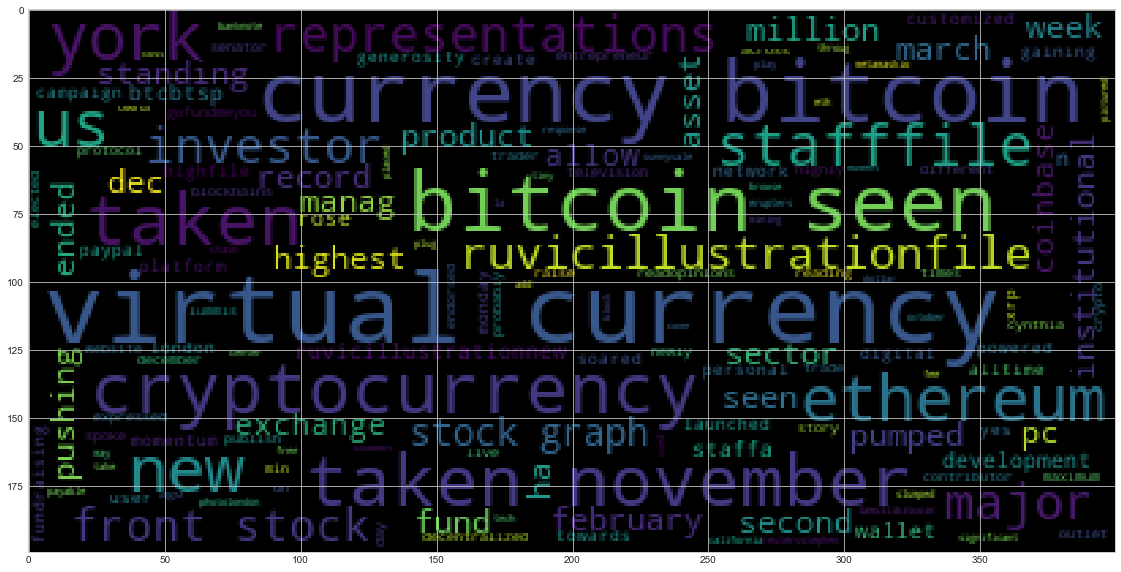

In [173]:
# Generating the Ethereum word cloud
eth_joined = " ".join(eth_unpacked)
wc = WordCloud().generate(eth_joined)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [174]:
# Importing dependencies
import spacy
from spacy import displacy

In [175]:
# Optional - download a language model for SpaCy
#!python -m spacy download en_core_web_sm

In [176]:
# Loading the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [193]:
# Concatenating all of the bitcoin text together
btc_text_unpacked = []
for x in btc_text:
    btc_text_unpacked.append(x)

btc_text_cleaned = " ".join(btc_text_unpacked)

In [194]:
# Running the NER processor on all of the text
btc_doc = nlp(btc_text_cleaned)

# Add a title to the document
# YOUR CODE HERE!

In [195]:
# Rendering the visualization
displacy.render(btc_doc, style='ent')

In [202]:
# List all Entities
btc_doc.ents

(Visa,
 first,
 Bitcoin,
 November 30th, 2020,
 December 1st,
 2020,
 bitcoin,
 above $20,000,
 almost three years,
 the day,
 Bitcoin,
 20,000,
 Wednesday,
 2020,
 late-year,
 Bitcoin,
 over $23,000,
 November 2017,
 two-month,
 Bitcoin,
 10,000,
 first,
 the next 20 days,
 19,665,
 digital yuan,
 the People’s Bank of China,
 the past few weeks,
 bitcoin,
 digital,
 hype,
 Bitcoin,
 20,000,
 14,800,
 more than 170%,
 this year,
 Six years,
 Mexico,
 $62 million,
 Decentralized,
 4,
 U.S.,
 November,
 today,
 500,
 10.8 percent,
 November,
 monthly,
 April,
 fourth,
 Grayson Blackmon /,
 the year,
 the day,
 Twitter,
 8,
 7,
 Bitcoin,
 above $18,000,
 Tuesday,
 evening,
 December 2017,
 this week,
 more than $18,000,
 6,
 6,
 one,
 above $20,000,
 Wednesday,
 a year,
 Reuters,
 Bitcoin,
 November 19, 2020,
 REUTERS/,
 Reu,
 Reuters,
 Bitcoin,
 U.S.,
 January 6, 2020,
 REUTERS/,
 Dado Ruvic/File Photo,
 LONDON,
 Reuters,
 Bitcoin,
 Justin HarperBusiness,
 BBC News,
 Bitcoin,
 above $17,

---

## Ethereum NER

In [199]:
# Concatenating all of the bitcoin text together
eth_text_unpacked = []
for x in eth_text:
    eth_text_unpacked.append(x)

eth_text_cleaned = " ".join(eth_text_unpacked)

In [ ]:
# Running the NER processor on all of the text
eth_doc = nlp(eth_text_cleaned)

# Add a title to the document


In [201]:
# Rendering the visualization
displacy.render(eth_doc, style='ent')

In [203]:
# Listing all Entities
eth_doc.ents

(February 3, 2018,
 REUTERS/,
 Reuters,
 February 3, 2018,
 REUTERS/,
 Reuters,
 LONDON,
 Reuters,
 XRP,
 Monday,
 Bitcoin,
 November 19, 2020,
 REUTERS/,
 Reuters,
 U.S.,
 Bitcoin,
 March 13, 2020,
 REUTERS/,
 Reuters,
 U.S.,
 Bitcoin,
 March 13, 2020,
 REUTERS/,
 Reuters,
 U.S.,
 NEW YORK,
 Reuters,
 $429 million,
 the week ended Dec. 7,
 second,
 NEW YORK,
 Reuters,
 $429 million,
 the week ended Dec. 7,
 second,
 PayPal,
 the Generosity Network,
 20,000,
 Reuters,
 Bitcoin,
 November 19, 2020,
 REUTERS/,
 Reuters,
 Bitcoin,
 November 19, 2020,
 REUTERS/,
 The New York Times,
 Coinbase,
 December,
 15,
 2020,
 6 min,
 A few days ago,
 US,
 Cynthia Lummis,
 Bitcoin,
 Reuters,
 Bitcoin,
 November 19, 2020,
 REUTERS/,
 Reuters,
 Reuters,
 Bitcoin,
 November 19, 2020,
 REUTERS/,
 Reuters,
 Reuters,
 Bitcoin,
 U.S.,
 May 26, 2020,
 REUTERS/,
 Reuters,
 Reuters,
 Bitcoin,
 November 19, 2020,
 REUTERS/,
 LONDON,
 Reuters,
 Bitcoin,
 Bitcoin,
 the Plug and Play Tech Center,
 Sunnyvale,
 Cal